In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

이 장의 주 예제 함수는 다음과 같이 삼각함수와 선형 항의 합으로 구성된다.

In [3]:
def f(x):
    return np.sin(x) + 0.5*x

회귀법과 보간법으로 근사화하는 것이 이번 목표.

In [5]:
x = np.linspace(-2*np.pi, 2*np.pi, 50)

Text(0, 0.5, 'f(x)')

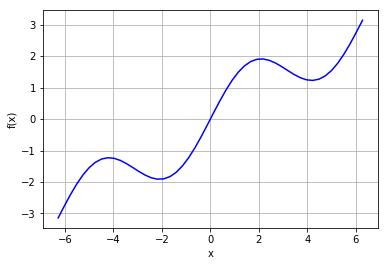

In [6]:
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

## 회귀법
polyfit 함수를 사용

In [7]:
reg = np.polyfit(x, f(x), deg=1) #deg 는 회귀 다항식의 차수
ry = np.polyval(reg, x)

Text(0, 0.5, 'f(x)')

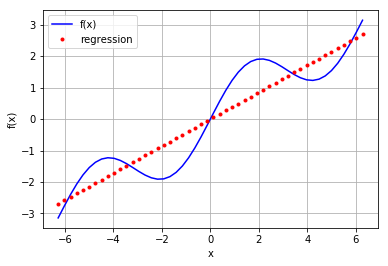

In [8]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

고차식을 통한 근사화

In [9]:
reg = np.polyfit(x, f(x), deg=5) #deg 는 회귀 다항식의 차수
ry = np.polyval(reg, x)

Text(0, 0.5, 'f(x)')

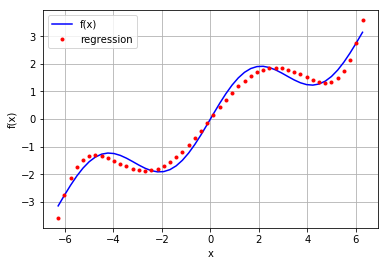

In [10]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [11]:
# 7차
reg = np.polyfit(x, f(x), deg=7) #deg 는 회귀 다항식의 차수
ry = np.polyval(reg, x)

Text(0, 0.5, 'f(x)')

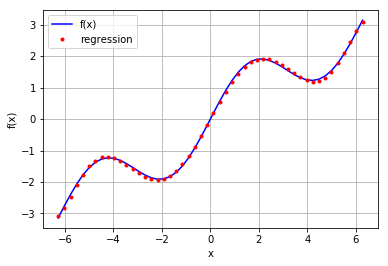

In [12]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [13]:
# MSE 측정
np.sum((f(x) - ry)**2) / len(x)

0.0017769134759517593

### 개별 기저함수
근사화하고자 하는 함수에 대해 알고있는 지식을 사용하여 더 적합한 기저 함수를 선택하면 회귀 결과를 향상시킬 수 있다.

In [14]:
matrix = np.zeros((3 + 1, len(x)))
matrix[3, :] = x **3
matrix[2, :] = x **2
matrix[1, :] = x
matrix[0, :] = 1

In [15]:
reg = np.linalg.lstsq(matrix.T, f(x))[0]

C:\Users\tohot\Anaconda3\envs\fba_1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [16]:
reg

array([ 1.50654604e-14,  5.62777448e-01, -1.11022302e-15, -5.43553615e-03])

Text(0, 0.5, 'f(x)')

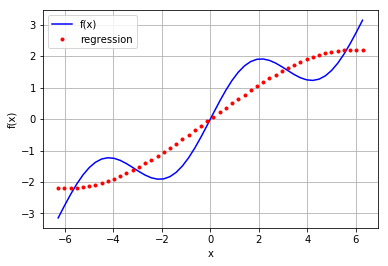

In [17]:
ry = np.dot(reg, matrix)
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [18]:
matrix[3, :] = np.sin(x)
reg = np.linalg.lstsq(matrix.T, f(x))[0]
ry = np.dot(reg, matrix)

C:\Users\tohot\Anaconda3\envs\fba_1\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


Text(0, 0.5, 'f(x)')

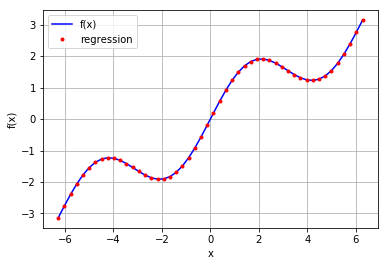

In [19]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [20]:
np.allclose(f(x), ry)

True

In [21]:
# MSE 측정
np.sum((f(x) - ry)**2) / len(x)

3.345571424993955e-31

### 잡음이 있는 자료
회귀법은 부정확한 측정으로 얻은 자료에도 적용할 수 있다.

In [24]:
xn = np.linspace(-2 * np.pi, 2*np.pi, 50)
xn = xn + 0.15 * np.random.standard_normal(len(xn))
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))

In [34]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

Text(0, 0.5, 'f(x)')

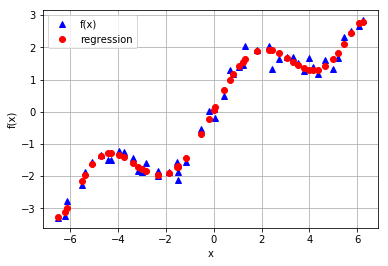

In [35]:
plt.plot(xn, yn, 'b^', label='f(x)')
plt.plot(xn, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

### 정렬되지 않은 자료

In [36]:
xu = np.random.rand(50)*4 *np.pi - 2*np.pi
yu = f(xu)
print (xu[:10].round(2))
print (yu[:10].round(2))

[-4.15 -2.72 -3.06  1.91 -3.65 -4.27 -4.72  4.42  4.01 -6.04]
[-1.23 -1.77 -1.61  1.9  -1.34 -1.23 -1.36  1.25  1.24 -2.78]


In [37]:
reg = np.polyfit(xu, yu, 5)
ry = np.polyval(reg, xu)

Text(0, 0.5, 'f(x)')

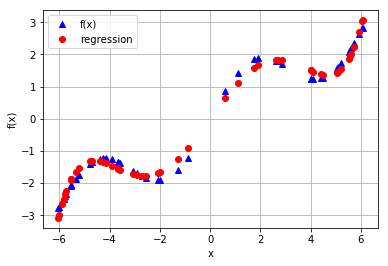

In [38]:
plt.plot(xu, yu, 'b^', label='f(x)')
plt.plot(xu, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

### 다차원자료

In [41]:
def fm(x, y):
    return np.sin(x) + 0.25*x + np.sqrt(y) + 0.05 * y**2

In [42]:
x = np.linspace(0,10,20)
y = np.linspace(0,10,20)
X, Y = np.meshgrid(x,y)
  # 1차원 배열에서 2차원 그리드를 생성한다.
Z = fm(X,Y)
x = X.flatten()
y = Y.flatten()
  # 2차원 그리드에서 1차원 배열을 생성한다.

In [43]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

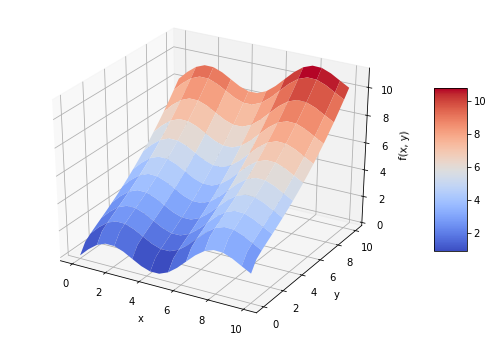

In [45]:
fig = plt.figure(figsize = (9,6))
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(X,Y,Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [46]:
matrix = np.zeros((len(x), 6+1))
matrix[:, 6] = np.sqrt(y)
matrix[:, 5] = np.sin(x)
matrix[:, 4] = y **2
matrix[:, 3] = x **2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

In [47]:
import statsmodels.api as sm
model = sm.OLS(fm(x,y), matrix).fit()

In [48]:
model.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x000001FEDA180DA0>>

In [51]:
model.rsquared

1.0

In [52]:
a = model.params
a

array([ 7.02216063e-15,  2.50000000e-01, -1.33226763e-15, -3.85108612e-16,
        5.00000000e-02,  1.00000000e+00,  1.00000000e+00])

In [54]:
def reg_func(a, x, y):
    f6 = a[6] * np.sqrt(y)
    f5 = a[5] * np.sin(x)
    f4 = a[4] * y**2
    f3 = a[3] * x**2
    f2 = a[2] * y
    f1 = a[1] * x
    f0 = a[0] * 1
    return (f6 + f5 + f4  + f3+ f2 + f1+ f0)

In [55]:
RZ = reg_func(a, X, Y)

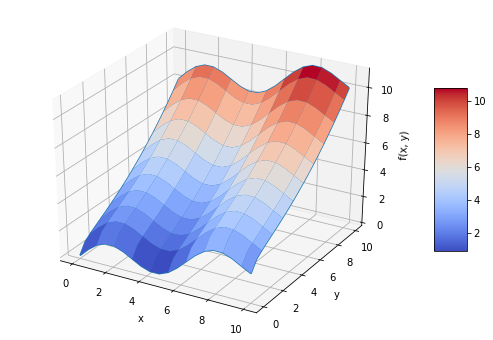

In [59]:
fig = plt.figure(figsize = (9,6))
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(X,Y,Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)

surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2, label = 'regression')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

## 보간법
두개의 이웃하는 관측점 사이의 자료를 계산하는 보간 함수를 만드는 것  
최소 3차 이상, 즉 큐빅 스플라인 함수이어야 한다.

In [60]:
import scipy.interpolate as spi

In [61]:
x = np.linspace(-2*np.pi, 2*np.pi, 25)

In [62]:
def f(x) : 
    return np.sin(x) + 0.5*x

In [63]:
ipo = spi.splrep(x, f(x), k=1) # k= 스플라인 함수의 차수
iy = spi.splev(x, ipo)

Text(0, 0.5, 'f(x)')

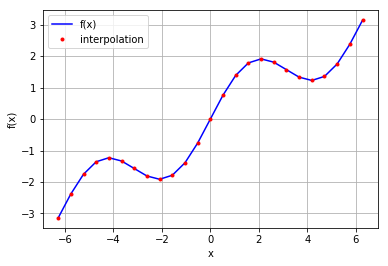

In [68]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, iy, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [69]:
xd = np.linspace(1.0, 3.0, 50)
iyd = spi.splev(xd, ipo)

Text(0, 0.5, 'f(x)')

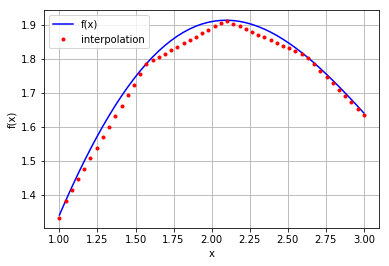

In [70]:
plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [71]:
ipo = spi.splrep(x, f(x), k=3) # k= 스플라인 함수의 차수
iyd = spi.splev(xd, ipo)

Text(0, 0.5, 'f(x)')

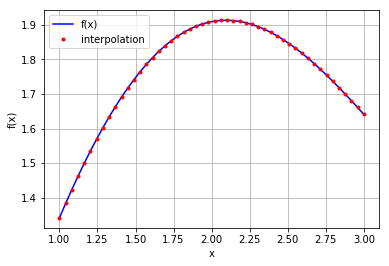

In [72]:
plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [73]:
np.sum((f(xd) - iyd)**2) / len(xd)

1.1349319851436252e-08

수치적으로는 보간이 완벽하지 않지만 최소자승오차는 아주 작다.  
스플라인 보간법을 적용하면 최소 자승 회귀법보다 더 정확한 근사 결과를 얻을 수 있다. 그러나 보간법을 사용하려면 자료가 정렬되어 있어야 하고 잡음이 없어야 하며 다차원 문제에는 적용할 수 없다. 또한 계산량이 더많기 때문에 어떤경우에는 회귀법보다 훨씬계산시간이 오래 걸릴 수 있다.